In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
hourData = pd.read_csv('bike+sharing+dataset/hour.csv')
hourData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


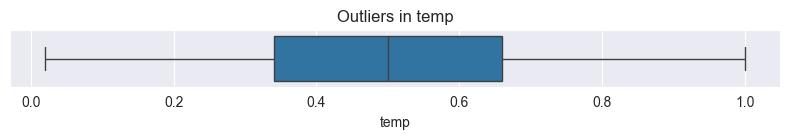

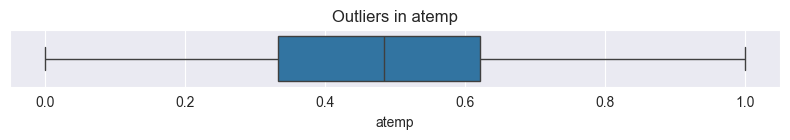

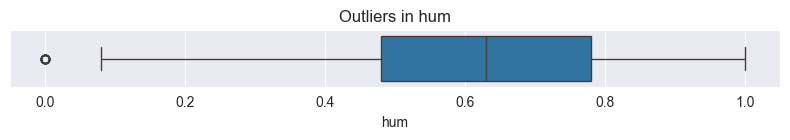

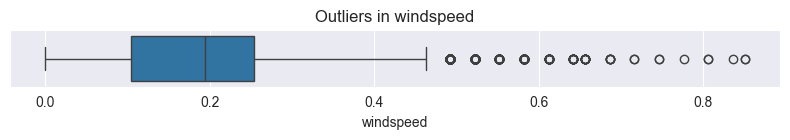

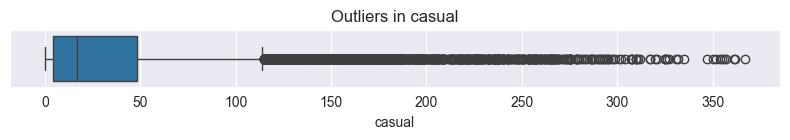

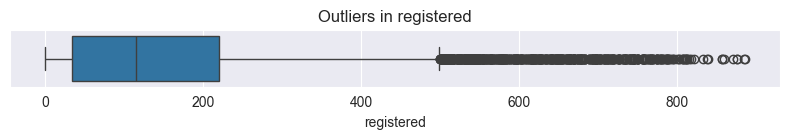

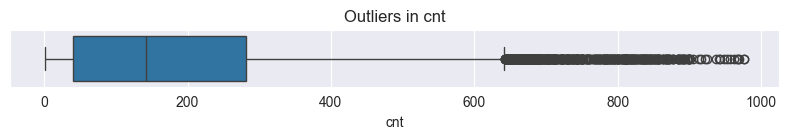

In [31]:
# Step 1: Select only numeric columns for visualization and outlier detection
numeric_cols = hourData.select_dtypes(include='number').columns

# Exclude columns that are not relevant for outlier detection (e.g., 'instant', 'dteday', etc.)
columns_to_exclude = ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
numeric_cols = [col for col in numeric_cols if col not in columns_to_exclude]

# Step 2: Loop through each numeric column and plot boxplots to visualize outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=hourData[col])
    plt.title(f'Outliers in {col}')
    plt.tight_layout()

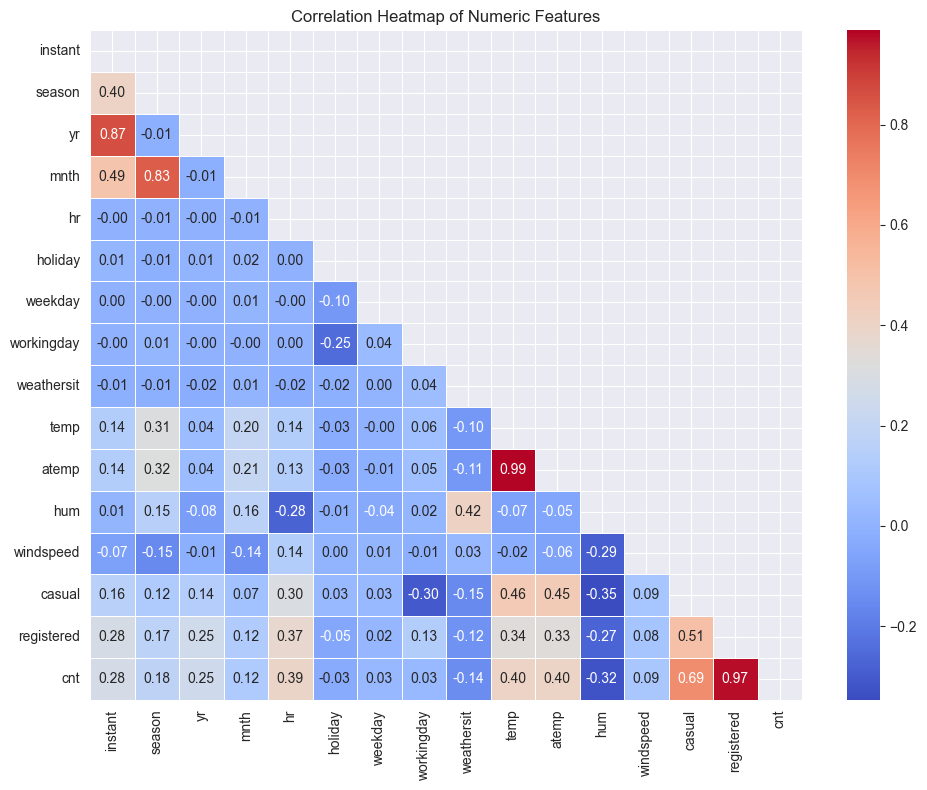

In [29]:
# Step 1: Compute the correlation matrix
correlation_matrix = hourData.corr(numeric_only=True)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Step 2: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()